<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2003%20-%20Runge%20Kutta/Supplementary/04_4th%20Runge%20Kutta%20Example%20Problem%20Sheet%20Question%202b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Sheet 3 Question 2b

The general form of the population growth differential equation
\begin{equation} y^{'}=y-t, \ \ (0 \leq t \leq 2) \end{equation}
with the initial condition
\begin{equation}y(0)=2\end{equation}
For N=4
with the analytic (exact) solution
\begin{equation} y= e^{t}+t+1.\end{equation}

# Runge Kutta Solution

The Runge Kutta difference equation is
\begin{equation}w_{i+1} = w_{i} + \frac{1}{6}(k_1+2k_2+2k_3+k_4) \end{equation}
where
\begin{equation}k_1=h(w_i-t_i)\end{equation}
\begin{equation}k_2=h((w_i+\frac{1}{2}k_1)-(t_i+\frac{h}{2}))\end{equation}
\begin{equation}k_3=h((w_i+\frac{1}{2}k_2)-(t_i+\frac{h}{2}))\end{equation}
\begin{equation}k_4=h((w_i+k_3)-(t_i+h))\end{equation}

In [1]:
import numpy as np
import math 
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import pandas as pd

import warnings
#from ipywidgets import *


In [ ]:
def myfun_ty(t,y):
    return y-t#+3*y



#PLOTS
def RK4_Question2(N,IC):

    x_end=4
    x_start=0
    INTITIAL_CONDITION=IC
    h=x_end/(N)
    N=N+2;
    k_list=np.zeros(N)
    t=np.zeros(N)
    w=np.zeros(N)
    k_mat=np.zeros((4,N))
    Analytic_Solution=np.zeros(N)
    k=0
    w[0]=INTITIAL_CONDITION
    Analytic_Solution[0]=INTITIAL_CONDITION
    t[0]=x_start
    k_list[k]=k
    for k in range (0,N-1):
        k_mat[0,k]=myfun_ty(t[k],w[k])
        k_mat[1,k]=myfun_ty(t[k]+h/2.0,w[k]+h/2.0*k_mat[0,k])
        k_mat[2,k]=myfun_ty(t[k]+h/2.0,w[k]+h/2.0*k_mat[1,k])
        k_mat[3,k]=myfun_ty(t[k]+h,w[k]+h*k_mat[2,k])
        w[k+1]=w[k]+h/6.0*(k_mat[0,k]+2*k_mat[1,k]+2*k_mat[2,k]+k_mat[3,k])
        t[k+1]=t[k]+h
        k_list[k+1]=k+1
        Analytic_Solution[k+1]=math.exp(t[k+1])+t[k+1]+1

    fig = plt.figure(figsize=(10,4))
    # --- left hand plot
    ax = fig.add_subplot(1,3,1)
    plt.plot(t,w,color='k')
    #ax.legend(loc='best')
    plt.title('Numerical Solution h=%s'%(h))

    # --- right hand plot
    ax = fig.add_subplot(1,3,2)
    plt.plot(t,Analytic_Solution,'-.o',color='blue')
    plt.title('Analytic Solution')

    #ax.legend(loc='best')
    ax = fig.add_subplot(1,3,3)
    plt.plot(t,Analytic_Solution-w,':o',color='red')
    plt.title('Error')

    # --- title, explanatory text and save



    # --- title, explanatory text and save
    fig.suptitle(r"$y'=y-t$", fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)    

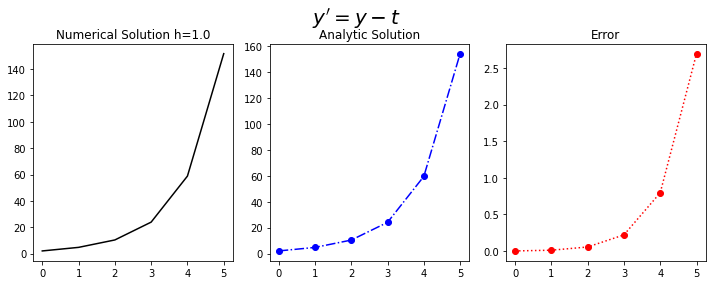

In [ ]:
RK4_Question2(4,2)